### Problem Statement

You are a data scientist / AI engineer at a medical research firm. You have been provided with a dataset named **`"cancer_data.csv"`**, which includes medical and lifestyle information for 1500 patients. The dataset is designed to predict the presence of cancer based on various features. The dataset comprises the following columns:

- `age:` Integer values representing the patient's age, ranging from 20 to 80.
- `gender:` Binary values representing gender, where 0 indicates Male and 1 indicates Female.
- `bmi:` Continuous values representing Body Mass Index, ranging from 15 to 40.
- `smoking:` Binary values indicating smoking status, where 0 means No and 1 means Yes.
- `genetic_risk:` Categorical values representing genetic risk levels for cancer, with 0 indicating Low, 1 indicating Medium, and 2 indicating High.
- `physical_activity:` Continuous values representing the number of hours per week spent on physical activities, ranging from 0 to 10.
- `alcohol_intake:` Continuous values representing the number of alcohol units consumed per week, ranging from 0 to 5.
- `cancer_history:` Binary values indicating whether the patient has a personal history of cancer, where 0 means No and 1 means Yes.
- `diagnosis:` Binary values indicating the cancer diagnosis status, where 0 indicates No Cancer and 1 indicates Cancer.

  
Your task is to use this dataset to build and compare the performance of Decision Tree and Random Forest models to predict the presence of cancer. Additionally, explore various parameters of the RandomForestClassifier to enhance model performance.

**Dataset credits:** Rabie El Kharoua (https://www.kaggle.com/datasets/rabieelkharoua/cancer-prediction-dataset)

**Import Necessary Libraries**

In [13]:
#import necessary libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

from sklearn.model_selection import train_test_split

#plotting niceties 
%matplotlib inline 
sns.set(style="whitegrid")


### Task 1: Data Preparation and Exploration

1. Import the data from the `"cancer_data.csv"` file and store it in a variable df.
2. Display the number of rows and columns in the dataset.
3. Display the first few rows of the dataset to get an overview.
4. Check for any missing values in the dataset.

In [14]:
# Step 1: Import the data from the "cancer_data.csv" file and store it in a variable 'df'
# Step 1B: load the data
df = pd.read_csv("cancer_data.csv")   
print("shape:",df.shape)
display(df.head(6))
display(df.info())
display(df.describe(include = "all").T)

# Step 2: Display the number of rows and columns in the dataset


# Step 3: Display the first few rows of the dataset to get an overview


shape: (1500, 9)


,age,gender,bmi,smoking,genetic_risk,physical_activity,alcohol_intake,cancer_history,diagnosis
0,58,1,16.085313,0,1,8.146251,4.148219,1,1
1,71,0,30.828784,0,1,9.361630,3.519683,0,0
2,48,1,38.785084,0,2,5.135179,4.728368,0,1
3,34,0,30.040295,0,0,9.502792,2.044636,0,0
4,62,1,35.479721,0,0,5.356890,3.309849,0,1
5,27,0,37.105162,0,1,3.941905,2.324274,0,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                1500 non-null   int64  
 1   gender             1500 non-null   int64  
 2   bmi                1500 non-null   float64
 3   smoking            1500 non-null   int64  
 4   genetic_risk       1500 non-null   int64  
 5   physical_activity  1500 non-null   float64
 6   alcohol_intake     1500 non-null   float64
 7   cancer_history     1500 non-null   int64  
 8   diagnosis          1500 non-null   int64  
dtypes: float64(3), int64(6)
memory usage: 105.6 KB


None

,count,mean,std,min,25%,50%,75%,max
age,1500.0,50.320000,17.640968,20.000000,35.000000,51.000000,66.000000,80.000000
gender,1500.0,0.490667,0.500080,0.000000,0.000000,0.000000,1.000000,1.000000
bmi,1500.0,27.513321,7.230012,15.000291,21.483134,27.598494,33.850837,39.958688
smoking,1500.0,0.269333,0.443761,0.000000,0.000000,0.000000,1.000000,1.000000
genetic_risk,1500.0,0.508667,0.678895,0.000000,0.000000,0.000000,1.000000,2.000000
physical_activity,1500.0,4.897929,2.866162,0.002410,2.434609,4.834316,7.409896,9.994607
alcohol_intake,1500.0,2.417987,1.419318,0.001215,1.210598,2.382971,3.585624,4.987115
cancer_history,1500.0,0.144000,0.351207,0.000000,0.000000,0.000000,0.000000,1.000000
diagnosis,1500.0,0.371333,0.483322,0.000000,0.000000,0.000000,1.000000,1.000000


In [15]:
# Step 4: Check for any missing values in the dataset
# Step 1D: missing values and simple counts
print("Missing values per column:\n", df.isnull().sum())
print("\nTarget class distribution (counts):")
print(df['diagnosis'].value_counts())
print("\nTarget distribution (proportions):")
print(df['diagnosis'].value_counts(normalize=True))

Missing values per column:
 age                  0
gender               0
bmi                  0
smoking              0
genetic_risk         0
physical_activity    0
alcohol_intake       0
cancer_history       0
diagnosis            0
dtype: int64

Target class distribution (counts):
diagnosis
0    943
1    557
Name: count, dtype: int64

Target distribution (proportions):
diagnosis
0    0.628667
1    0.371333
Name: proportion, dtype: float64


### Task 2: Model Training Using Decision Tree Classifier

1. Select the features `(age, gender, bmi, smoking, genetic_risk, physical_activity, alcohol_intake, cancer_history)` and the target variable `(diagnosis)` for modeling.
2. Split the data into training and test sets with a test size of 25%.
3. Initialize and train a Decision Tree Classifier model using the training data.
4. Make predictions on the test set using the trained model.
5. Evaluate the model using a classification report and print the report.

In [16]:
# Step 1: Select the features and target variable for modeling
X = df[['age', 'gender', 'bmi', 'smoking', 'genetic_risk', 
        'physical_activity', 'alcohol_intake', 'cancer_history']]

y = df['diagnosis']
print("Feature matrix shape:", X.shape)
print("Target vector shape:", y.shape)

# Step 2: Split the data into training and test sets with a test size of 25%


Feature matrix shape: (1500, 8)
Target vector shape: (1500,)


In [17]:
# Step 3: Initialize and train a Decision Tree Classifier model using the training data
from sklearn.model_selection import train_test_split

# Step 2: Split the dataset (75% train, 25% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

print("Training set size:", X_train.shape)
print("Test set size:", X_test.shape)

# Step : Initialize and train the Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(random_state=42)  
dt_model.fit(X_train, y_train)

# Step 4: Make predictions on the test set using the trained model
y_pred = dt_model.predict(X_test)

# Step 5: Evaluate the model using a classification report and print the report
from sklearn.metrics import classification_report, accuracy_score

# Step 5: Evaluate performance
print("Decision Tree Performance:\n")
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

Training set size: (1125, 8)
Test set size: (375, 8)
Decision Tree Performance:

              precision    recall  f1-score   support

           0       0.88      0.87      0.88       236
           1       0.78      0.81      0.79       139

    accuracy                           0.85       375
   macro avg       0.83      0.84      0.84       375
weighted avg       0.85      0.85      0.85       375

Accuracy: 0.8453333333333334


### Task 3: Model Training Using Random Forest Classifier

1. Initialize and train a Random Forest Classifier model with 25 estimators using the training data.
2. Make predictions on the test set using the trained model.
3. Evaluate the model using a classification report and print the report.

In [18]:
#importing some libraries 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_auc_score,roc_curve

In [19]:
# Step 1: Initialize and train a Random Forest Classifier model with 25 estimators using the training data
rf = RandomForestClassifier(n_estimators = 25,random_state = 42,n_jobs = -1)
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)

# Step 2: Make predictions on the test set using the trained model
# 4) (Optional) predicted probabilities for ROC-AUC
if hasattr(rf, "predict_proba"):
    y_proba = rf.predict_proba(X_test)[:, 1]   # probability of positive class
else:
    y_proba = None
# Step 3: Evaluate the model using a classification report and print the report
print("=== Random Forest Performance ===\n")
print(classification_report(y_test, y_pred, digits=4))
print("Accuracy:", accuracy_score(y_test, y_pred))

=== Random Forest Performance ===

              precision    recall  f1-score   support

           0     0.9221    0.9534    0.9375       236
           1     0.9160    0.8633    0.8889       139

    accuracy                         0.9200       375
   macro avg     0.9191    0.9083    0.9132       375
weighted avg     0.9199    0.9200    0.9195       375

Accuracy: 0.92



Confusion matrix:
 [[225  11]
 [ 19 120]]


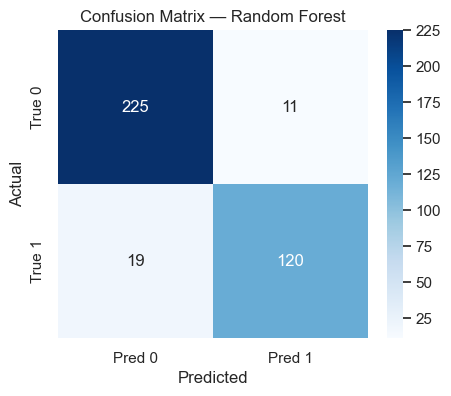

In [20]:
# 6) Confusion matrix (numeric + heatmap)
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion matrix:\n", cm)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Pred 0','Pred 1'],
            yticklabels=['True 0','True 1'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix — Random Forest")
plt.show()


### Task 4: Exploring Various Parameters in Random Forest Classifier

1. Train a Random Forest model with the following parameters:
   - n_estimators = 50
   - max_features = "log2"
   - criterion = "entropy"
   - bootstrap = False
   - max_depth = 15
   - min_samples_split = 5
   - min_samples_leaf = 3

Learn about these parameters here: [scikit-learn RandomForestClassifier Parameters](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)


--------------------------------------------------------------------------------------------------------------------------------------------------------
2. Evaluate the model using a classification report and print the report.

In [21]:
#importing libraries 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score


In [22]:
# Step 1: Train a Random Forest model with specified parameters
rf_custom = RandomForestClassifier(
    n_estimators=50,
    max_features="log2",
    criterion="entropy",
    bootstrap=False,
    max_depth=15,
    min_samples_split=5,
    min_samples_leaf=3,
    random_state=42,
    n_jobs=-1
)
rf_custom.fit(X_train, y_train)


# Step 2: Make predictions on the test set using the trained model
y_pred_custom = rf_custom.predict(X_test)


# Step 3: Evaluate the model using a classification report and print the report
print("=== Random Forest (Custom Parameters) ===")
print(classification_report(y_test, y_pred_custom))
print("Accuracy:", accuracy_score(y_test, y_pred_custom))

=== Random Forest (Custom Parameters) ===
              precision    recall  f1-score   support

           0       0.94      0.97      0.96       236
           1       0.95      0.89      0.92       139

    accuracy                           0.94       375
   macro avg       0.95      0.93      0.94       375
weighted avg       0.94      0.94      0.94       375

Accuracy: 0.944


In [23]:
# Optional: Confusion Matrix
cm = confusion_matrix(y_test, y_pred_custom)
print("\nConfusion Matrix:\n", cm)


Confusion Matrix:
 [[230   6]
 [ 15 124]]
